In [106]:
import numpy as np
import torch as pt
import sympy as sp
import matplotlib.pyplot as plt

# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

In [107]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [6.164248 1.608618 3.227134]
Autovectores:
 [[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]


In [108]:
from sympy import roots # raices del polinomio caracteristico
from sympy.abc import x
roots(-x**3+11*x**2-35*x+32)

{11/3 + 16/(9*(61/54 + sqrt(1407)*I/18)**(1/3)) + (61/54 + sqrt(1407)*I/18)**(1/3): 1,
 11/3 + 16/(9*(-1/2 + sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3): 1,
 11/3 + (-1/2 - sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3) + 16/(9*(-1/2 - sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3)): 1}

In [109]:
from sympy import symbols, solve
x = symbols('x')
polinomio_c = -x**3 + 11*x**2 - 35*x +32
# Encuentra las raíces de la expresión
raices = solve(polinomio_c, x)
print(raices)

[11/3 + (-1/2 - sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3) + 16/(9*(-1/2 - sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3)), 11/3 + 16/(9*(-1/2 + sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(61/54 + sqrt(1407)*I/18)**(1/3), 11/3 + 16/(9*(61/54 + sqrt(1407)*I/18)**(1/3)) + (61/54 + sqrt(1407)*I/18)**(1/3)]


### Matriz Diagonal

In [110]:
D = np.linalg.inv(U)@A@U # autovectores
np.set_printoptions(suppress=True, precision=6)
D #autovalores en la diagonal

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

In [111]:
np.set_printoptions(suppress=True, precision=6)


In [112]:
D = np.linalg.inv(U)@A@U
D

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

In [113]:
D=U.T@A@U
D

array([[ 6.164248,  0.      , -0.      ],
       [ 0.      ,  1.608618,  0.      ],
       [-0.      ,  0.      ,  3.227134]])

In [114]:
np.exp(D)

array([[475.443446,   1.      ,   1.      ],
       [  1.      ,   4.9959  ,   1.      ],
       [  1.      ,   1.      ,  25.20732 ]])

## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




In [115]:
A=np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])
def e_A(A):
  autovalores, autovectores = np.linalg.eig(A)
  P = autovectores.copy()
  P_I= np.linalg.inv(P)
  D = P_I@A@P
  eD=np.exp(D)
  eA=P@eD@P_I
  return eA

In [116]:
e_A(A)

array([[214.969886, 221.287912,  61.157686],
       [221.287912, 246.9498  ,  78.061926],
       [ 61.157686,  78.061926,  43.726981]])

# Autovalores y autovectores complejos

In [117]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Autovalores: [0.707107+0.707107j 0.707107-0.707107j]
Autovectores:
 [[0.707107+0.j       0.707107-0.j      ]
 [0.      +0.707107j 0.      -0.707107j]]


array([[0.707107+0.707107j, 0.      +0.j      ],
       [0.      +0.j      , 0.707107-0.707107j]])

In [118]:
np.exp(D)

array([[1.541863+1.317538j, 1.      +0.j      ],
       [1.      +0.j      , 1.541863-1.317538j]])

Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola

In [119]:
#Soluciones
H1= lambda x:(1/3)*(2*x-np.sqrt(x**2+18))
H2= lambda x:(1/3)*(np.sqrt(x**2 +18)+2*x)
x=np.linspace(-6, 6, 100)

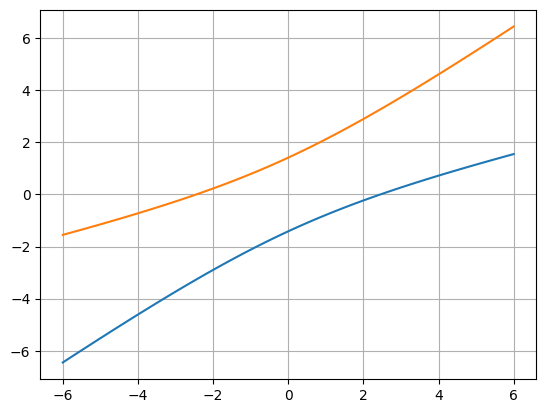

In [120]:
plt.plot(x,H1(x))
plt.plot(x,H2(x))
plt.grid(True)

In [121]:
A =np.array([[1, -2],
              [-2, 3]])
autovalores, autovectores = np.linalg.eig(A)
Q = autovectores.copy()
D = np.linalg.inv(Q)@A@Q
np.set_printoptions(suppress=True, precision=6)
D, Q, Q.T@D@Q

(array([[-0.236068, -0.      ],
        [-0.      ,  4.236068]]),
 array([[-0.850651,  0.525731],
        [-0.525731, -0.850651]]),
 array([[1., 2.],
        [2., 3.]]))

In [122]:
A=Q@D@Q.T
A

array([[ 1., -2.],
       [-2.,  3.]])

In [123]:
import sympy as sp

In [124]:
A_, Q_, D_ = sp.Matrix(A), sp.Matrix(Q), sp.Matrix(D)
x,y = sp.Symbol("x"), sp.Symbol("y")
v = sp.Matrix([x,y])
u = Q_.T@v
d = u.T@(D_@u)
d[0,0]


(-0.85065080835204*x - 0.525731112119133*y)*(0.200811415886227*x + 0.124108280346679*y) + (0.525731112119133*x - 0.85065080835204*y)*(2.22703272882321*x - 3.60341464929439*y)

In [125]:
sp.solve(d[0,0],y)

[0.333333333333333*x, 0.999999999999998*x]

### Sympy

In [126]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


Autovalores simplificados: {11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1, (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}
Autovectores simplificados:
 [((-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), 1, [Matrix([
[(12*(-176 + 7*2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)**2*(61 + 3*sqrt(1407)*I) + (61 + 3*sqrt(1407)*I)**(1/3)*(128*2**(1/3) + (-44 + 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))**2 + 10752*2**(1/3)*(1 + sqrt(3)

In [127]:
autovalores_simplificados

{11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1,
 (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1,
 (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |



Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [128]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [129]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [130]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

In [131]:
matrixA(x, tipo="pt")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

Actividad: Resolver el problema de la potencia de una matriz empleando pytorch, construir.

In [132]:
#Primero con numpy
A =np.array([[1, -2],
              [-2, 3]])

In [133]:
def producto_matrices(A,B):
  dim1=np.shape(A)
  dim2=np.shape(B)
  producto=np.zeros((dim1[0], dim2[1]))

  if dim1[1]==dim2[0]:
   for i in range(0,dim1[0]):
    for j in range(0, dim2[1]):
      producto[i,j]=np.sum(A[i]*B[:,j])
   return producto

  else:
    return print('El producto de matrices no se puede relizar por sus dimensiones')


In [134]:
def potencia_matriz(A, n):
    if n == 0:
        return np.eye(len(A))
    elif n < 0:
        return np.linalg.inv(potencia_matriz(A, -n))
    else:
        B = A.copy()
        for _ in range(1, n):
            resultado = producto_matrices(B, A)
            B=resultado
        return B

In [135]:
potencia_matriz(A, 3)

array([[ 21., -34.],
       [-34.,  55.]])

In [136]:
def matriz_potencia(matriz, n):
    return np.linalg.matrix_power(matriz, n)

matriz_potencia(A, 3)



array([[ 21, -34],
       [-34,  55]])

In [137]:
#Codigo con pytorch
import torch as pt
A=pt.tensor([[1, -2],[-2, 3]])

def producto_matrices(A, B):
    dim1 = A.shape
    dim2 = B.shape
    producto = pt.zeros((dim1[0], dim2[1]))

    if dim1[1] == dim2[0]:
        for i in range(0, dim1[0]):
            for j in range(0, dim2[1]):
                producto[i, j] = pt.sum(A[i] * B[:, j])
        return producto
    else:
        return print('El producto de matrices no se puede realizar por sus dimensiones')

def potencia_matriz(A, n):
    if n == 0:
        return pt.eye(len(A))
    elif n < 0:
        return pt.inverse(potencia_matriz(A, -n))
    else:
        B = A.clone()
        for _ in range(1, n):
            resultado = producto_matrices(B, A)
            B = resultado
        return B

potencia_matriz(A, 3)



tensor([[ 21., -34.],
        [-34.,  55.]])